# 22. 머신러닝 기초2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

☝️ sklearn 을 쓰면 target / feature 를 분리해줄 필요가 없음 (이미 분리되어있음)

In [10]:
load_iris().data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [11]:
load_iris().data.shape

(150, 4)

In [12]:
iris = load_iris().data

In [17]:
iris[:,0].shape

(150,)

In [20]:
X = iris[:,0].reshape(-1, 1) # iris[:,0] -> 1차원이었던 X값을 2차원으로 만들어줌 (target은 2차원으로 만들어야함)

In [21]:
X.shape

(150, 1)

In [22]:
y = iris[:,2] # 2차원으로 안만들어도 됨

In [31]:
y.shape

(150,)

<Axes: >

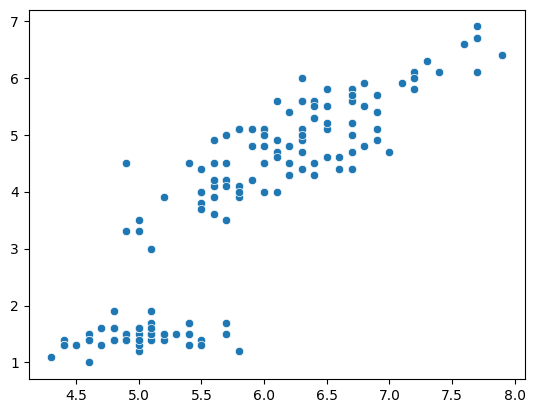

In [26]:
sns.scatterplot(x=X.flatten(), y=y) # flatten -> 2차원 배열을 1차원으로 만듦

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
X_test.shape

(30, 1)

In [32]:
model = LinearRegression()

In [33]:
model.fit(X_train, y_train) # fit -> 모델 학습을 한다는 뜻

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [39]:
w = model.coef_[0] # coef_ 리턴값이 array 형태이기 때문에 int값 가져오기위해 [0]으로
w

np.float64(1.833962599020347)

In [38]:
b = model.intercept_ # y절편
b

np.float64(-6.927127731475698)

☝️ y = wx + b

In [40]:
y_pred = model.predict(X_test) # test set으로 예상치 계산

In [43]:
y_test

array([4.7, 1.7, 6.9, 4.5, 4.8, 1.5, 3.6, 5.1, 4.5, 3.9, 5.1, 1.4, 1.3,
       1.5, 1.5, 4.7, 5.8, 3.9, 4.5, 5.6, 1.6, 4.9, 1.6, 5.6, 6.4, 5.2,
       5.8, 5.9, 1.4, 1.6])

In [42]:
y_pred

array([4.26004412, 3.52645908, 7.19438428, 4.07664786, 5.54381794,
       2.9762703 , 3.34306282, 5.7272142 , 4.44344038, 3.70985534,
       4.99362916, 1.87589274, 3.15966656, 2.059289  , 2.42608152,
       4.62683664, 4.99362916, 3.34306282, 3.52645908, 4.8102329 ,
       1.69249648, 4.26004412, 2.24268526, 4.8102329 , 7.5611768 ,
       5.36042168, 5.36042168, 5.54381794, 1.87589274, 1.87589274])

In [44]:
mse = mean_squared_error(y_test, y_pred)
mse

0.5960765879745179

In [46]:
r2 = r2_score(y_test, y_pred)
r2

0.8181245472591439

In [62]:
x_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1) # == .reshape(100, 1)
x_line.shape

(100, 1)

In [65]:
y_line = model.predict(x_line)

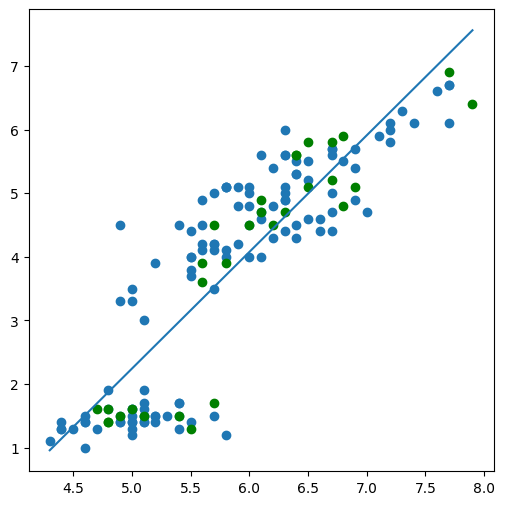

In [74]:
plt.figure(figsize=(6, 6))
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test, c='g')

plt.plot(x_line, y_line)

In [76]:
iris

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [77]:
X_all = iris[:, [0,1,3]] # 전체행, [0][1][3]에 해당하는 열 가져오기
X_all.shape

(150, 3)

In [79]:
y

array([1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4,
       1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1. , 1.7, 1.9, 1.6,
       1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.4, 1.3,
       1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4, 4.7, 4.5,
       4.9, 4. , 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4. , 4.7, 3.6,
       4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4. , 4.9, 4.7, 4.3, 4.4, 4.8, 5. ,
       4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1, 4. , 4.4,
       4.6, 4. , 3.3, 4.2, 4.2, 4.2, 4.3, 3. , 4.1, 6. , 5.1, 5.9, 5.6,
       5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5, 5. , 5.1, 5.3, 5.5,
       6.7, 6.9, 5. , 5.7, 4.9, 6.7, 4.9, 5.7, 6. , 4.8, 4.9, 5.6, 5.8,
       6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8, 5.4, 5.6, 5.1, 5.1,
       5.9, 5.7, 5.2, 5. , 5.2, 5.4, 5.1])

In [80]:
X_all_train, X_all_test, y_all_train, y_all_test = train_test_split(X_all, y, test_size=0.2, random_state=42)

In [81]:
model_all = LinearRegression()

In [82]:
model_all.fit(X_all_train, y_all_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [83]:
y_all_pred = model_all.predict(X_all_test)
y_all_pred

array([4.12771597, 1.882002  , 7.02565911, 4.43211007, 4.92719101,
       2.06623661, 3.84947941, 6.12949916, 5.02174454, 3.97445323,
       5.33653445, 1.44661722, 1.78143162, 1.45531704, 1.44831322,
       4.54138026, 5.75720255, 3.8103012 , 3.98534252, 5.81208439,
       1.39392486, 4.88106709, 1.77711076, 5.66533199, 5.96698503,
       6.04851788, 5.63266411, 5.99363605, 1.74012203, 1.52978798])

In [91]:
mse_all = mean_squared_error(y_all_test, y_all_pred) # 0에 가까울 수록 좋음, 오차가 작다 (평균 제곱근 오차)
mse_all

0.1300162603138271

In [87]:
r2_all = r2_score(y_all_test, y_all_pred)
r2_all

0.9603293155857663

In [88]:
r2

0.8181245472591439

유의미한 feature가 많아질수록, 평균오차도 줄고 r2 늘어남

In [89]:
model_all.coef_

array([ 0.72281463, -0.63581649,  1.46752403])

In [90]:
model_all.intercept_

np.float64(-0.26219590258870795)

In [96]:
df = pd.read_csv('train.csv')

In [99]:
df_t = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']].replace(0, pd.NA)

In [104]:
df_t = df_t.dropna()

In [105]:
df_t

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,103,60,33,192,24.0,0.966,33
3,119,88,41,170,45.3,0.507,26
4,114,66,36,200,38.1,0.289,21
5,78,50,32,88,31.0,0.248,26
6,91,54,25,100,25.2,0.234,23
...,...,...,...,...,...,...,...
636,171,110,24,240,45.4,0.721,54
637,152,90,33,29,26.8,0.731,43
638,139,62,41,480,40.7,0.536,21
643,147,74,25,293,34.9,0.385,30


In [107]:
df_t.corr()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Glucose,1.000000,0.213390,0.214293,0.600479,0.212549,0.140880,0.342942
BloodPressure,0.213390,1.000000,0.249560,0.088505,0.292520,-0.031260,0.301791
SkinThickness,0.214293,0.249560,1.000000,0.200479,0.632375,0.119519,0.182784
Insulin,0.600479,0.088505,0.200479,1.000000,0.258074,0.182614,0.196610
BMI,0.212549,0.292520,0.632375,0.258074,1.000000,0.111317,0.078956
DiabetesPedigreeFunction,0.140880,-0.031260,0.119519,0.182614,0.111317,1.000000,0.103043
Age,0.342942,0.301791,0.182784,0.196610,0.078956,0.103043,1.000000


In [113]:
X = df_t.drop('Glucose', axis=1) #feature
y = df_t['Glucose'] # target

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # train, test 분리

In [116]:
model = LinearRegression() # 모델 생성

In [117]:
model.fit(X_train, y_train) # 모델 학습

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [118]:
model.coef_ # 모델 가중치 확인

array([ 0.33607029,  0.15801432,  0.14180507, -0.23165704,  3.61528792,
        0.69783325])

In [119]:
model.intercept_ # 모델 편향 확인

np.float64(56.36822650949914)

In [120]:
y_pred = model.predict(X_test) # y 예상치

In [123]:
r2 = r2_score(y_test, y_pred)
r2

0.2380495366726243

In [124]:
model.score(X_test, y_test) # == r2_score

0.2380495366726243

<Axes: xlabel='SkinThickness', ylabel='Glucose'>

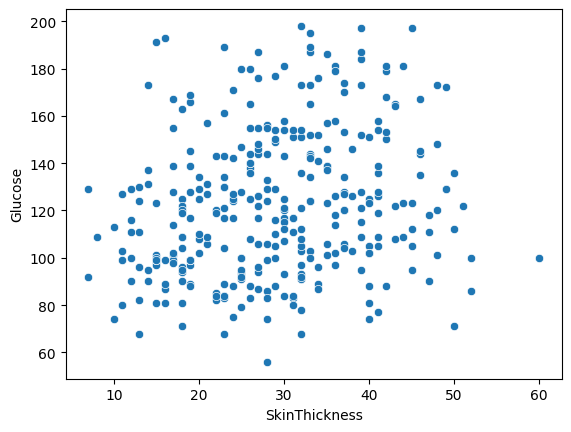

In [128]:
sns.scatterplot(x=df_t['SkinThickness'], y=df_t['Glucose']) # 분산이 크다

In [142]:
model2 = make_pipeline(PolynomialFeatures(2), LinearRegression()) # 2차함수로 다항회귀와, 선형회귀 만듦

In [140]:
model2.fit(X_train, y_train)

,steps,"[('polynomialfeatures', ...), ('linearregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,degree,2
,interaction_only,False
,include_bias,True
,order,'C'
,fit_intercept,True
,copy_X,True
,tol,1e-06


In [141]:
model2.score(X_test, y_test)

0.2835362094145758

2차함수로 하면 0.28로 더 올라감 (선형 r2 0.23)  
3차함수로 하면 -1.4로 떨어지면서 오히려 과적합 발생